# Trajectory generation

In [35]:
import numpy as np

def generate_trajectory(start, end, T=0.2):

    x0, y0, z0, h0 = start
    x1, y1, z1, h1 = end
    
    # Calculate the number of samples
    distance = np.sqrt((x1 - x0)**2 + (y1 - y0)**2 + (z1 - z0)**2)
    num_samples = int(np.ceil(distance / T)) + 1
    
    # Generate linearly spaced points between start and end
    x = np.linspace(x0, x1, num_samples)
    y = np.linspace(y0, y1, num_samples)
    z = np.linspace(z0, z1, num_samples)
    heading = np.linspace(h0, h1, num_samples)
    
    # Format the trajectory as a list of tuples
    trajectory = [(xi, yi, zi, hi) for xi, yi, zi, hi in zip(x, y, z, heading)]
    
    return trajectory

def save_trajectory(trajectory, filename):
    with open(filename, 'w') as file:
        for point in trajectory:
            line = ','.join(map(str, point)) + '\n'
            file.write(line)

start_point = (-40, -40, 3, 0.0)
end_point = (-32, -32, 3, 0.0)
trajectory = generate_trajectory(start_point, end_point, T=0.2)
filename = 'trajectory.txt'
save_trajectory(trajectory, filename)

print(f"Trajectory saved to {filename}.")

Trajectory saved to trajectory.txt.


In [8]:
import numpy as np


def generate_trajectory(waypoints, hover_times, T=0.2):
    trajectory = []
    for i in range(len(waypoints) - 1):
        x0, y0, z0, h0 = waypoints[i]
        x1, y1, z1, h1 = waypoints[i+1]
        hover_time = hover_times[i]
        
        # Calculate number of samples for the hover period
        num_hover_samples = int(hover_time / T)
        trajectory.extend([(x0, y0, z0, h0)] * num_hover_samples)
        
        # Interpolate  waypoints
        distance = np.sqrt((x1 - x0)**2 + (y1 - y0)**2 + (z1 - z0)**2)
        num_travel_samples = int(np.ceil(distance / T))
        if num_travel_samples > 0:
            x = np.linspace(x0, x1, num_travel_samples + 1)
            y = np.linspace(y0, y1, num_travel_samples + 1)
            z = np.linspace(z0, z1, num_travel_samples + 1)
            heading = np.linspace(h0, h1, num_travel_samples + 1)
            trajectory.extend([(xi, yi, zi, hi) for xi, yi, zi, hi in zip(x[1:], y[1:], z[1:], heading[1:])])
    
    # Add hover time at the last waypoint
    x_last, y_last, z_last, h_last = waypoints[-1]
    num_final_hover_samples = int(hover_times[-1] / T)
    trajectory.extend([(x_last, y_last, z_last, h_last)] * num_final_hover_samples)
    
    return trajectory

In [1]:
import numpy as np

def generate_trajectory(waypoints, hover_times, T=0.2):
    trajectory = []

    # Add the first waypoint
    x0, y0, z0, h0 = waypoints[0]
    trajectory.append((x0, y0, z0, h0))
    
    for i in range(len(waypoints) - 1):
        x0, y0, z0, h0 = waypoints[i]
        x1, y1, z1, h1 = waypoints[i+1]
        hover_time = hover_times[i]
        
        # Calculate number of samples for the hover period
        num_hover_samples = int(hover_time / T)
        trajectory.extend([(x0, y0, z0, h0)] * num_hover_samples)
        
        # Interpolate waypoints
        distance = np.sqrt((x1 - x0)**2 + (y1 - y0)**2 + (z1 - z0)**2)
        num_travel_samples = int(np.ceil(distance / T))
        if num_travel_samples > 0:
            x = np.linspace(x0, x1, num_travel_samples + 1)
            y = np.linspace(y0, y1, num_travel_samples + 1)
            z = np.linspace(z0, z1, num_travel_samples + 1)
            heading = np.linspace(h0, h1, num_travel_samples + 1)
            trajectory.extend([(xi, yi, zi, hi) for xi, yi, zi, hi in zip(x[1:], y[1:], z[1:], heading[1:])])
    
    # Add hover time at the last waypoint
    x_last, y_last, z_last, h_last = waypoints[-1]
    num_final_hover_samples = int(hover_times[-1] / T)
    trajectory.extend([(x_last, y_last, z_last, h_last)] * num_final_hover_samples)
    
    return trajectory

In [12]:
""" 
waypoints = [
    (0.28, -13.91, 344.88, -2.16),
    (12.62, -27.13, 345.56, -2.16),
    (24.96, -40.34, 346.24, -2.16),
    (37.30, -53.56, 346.92, -2.16),
    (49.64, -66.78, 347.60, -2.16),
    (61.98, -79.99, 348.28, -2.16),
    (74.32, -93.21, 348.96, -2.16),
    (86.66, -106.43, 349.64, -2.16),
    (98.99, -119.64, 350.32, -2.16),
    (111.33, -132.86, 351.00, -2.16),
    (123.67, -146.08, 351.68, -2.16),
    (136.01, -159.29, 352.36, -2.16),
    (148.35, -172.51, 353.04, -2.16),
    (160.69, -185.73, 353.72, -2.16),
    (173.03, -198.94, 354.40, -2.16),
    (185.37, -212.16, 355.08, -2.16),
    (197.71, -225.37, 355.76, -2.16),
    (210.05, -238.59, 356.44, -2.16),
    (222.39, -251.81, 357.12, -2.16),
    (234.73, -265.02, 357.80, -2.16),
    (247.07, -278.24, 358.48, -2.16),
    (0.28, -13.91, 344.88, -2.16)
] """

#0_1
""" waypoints = [
    (0.00, 0.00, 8.87, -2.38),
    (12.32, -13.29, 9.55, -2.38),
    (24.58, -26.58, 10.22, -2.38),
    (36.90, -39.75, 10.90, -2.38),
    (49.22, -53.04, 11.58, -2.38),
    (61.55, -66.33, 12.25, -2.38),
    (73.87, -79.62, 12.94, -2.38),
    (86.19, -92.91, 13.62, -2.38),
    (98.52, -106.20, 14.29, -2.38),
    (110.84, -119.49, 14.97, -2.38),
    (123.17, -132.78, 15.65, -2.38),
    (135.49, -145.95, 16.32, -2.38),
    (147.82, -159.24, 17.00, -2.38),
    (160.14, -172.53, 17.68, -2.38),
    (172.46, -185.82, 18.35, -2.38),
    (184.79, -199.11, 19.03, -2.38),
    (197.11, -212.40, 19.69, -2.38),
    (209.44, -225.69, 20.35, -2.38),
    (221.69, -238.86, 21.03, -2.38),
    (234.01, -252.15, 21.72, -2.38),
    (246.34, -265.44, 22.39, -2.38),
    (0.00, 0.00, 8.87, -2.38)
] """
#0_2
""" waypoints = [
    (0.00, 0.00, 16.36, -2.38),
    (12.32, -13.29, 17.04, -2.38),
    (24.58, -26.58, 17.71, -2.38),
    (36.90, -39.75, 18.40, -2.38),
    (49.22, -53.04, 19.08, -2.38),
    (61.55, -66.33, 19.71, -2.38),
    (73.87, -79.62, 20.39, -2.38),
    (86.19, -92.91, 21.06, -2.38),
    (98.52, -106.20, 21.75, -2.38),
    (110.84, -119.49, 22.43, -2.38),
    (123.17, -132.78, 23.10, -2.38),
    (135.49, -145.95, 23.79, -2.38),
    (147.82, -159.24, 24.47, -2.38),
    (160.14, -172.53, 25.14, -2.38),
    (172.46, -185.82, 25.82, -2.38),
    (184.79, -199.11, 26.50, -2.38),
    (197.11, -212.40, 27.19, -2.38),
    (209.44, -225.69, 27.86, -2.38),
    (221.69, -238.86, 28.54, -2.38),
    (234.01, -252.15, 29.22, -2.38),
    (246.34, -265.44, 29.90, -2.38),
    (0.00, 0.00, 16.36, -2.38)
] """

""" waypoints = [
    (0.00, 0.00, 23.92, -2.38),
    (12.32, -13.29, 24.59, -2.38),
    (24.58, -26.58, 25.26, -2.38),
    (36.90, -39.75, 25.94, -2.38),
    (49.22, -53.04, 26.62, -2.38),
    (61.55, -66.33, 27.30, -2.38),
    (73.87, -79.62, 27.98, -2.38),
    (86.19, -92.91, 28.66, -2.38),
    (98.52, -106.20, 29.34, -2.38),
    (110.84, -119.49, 30.02, -2.38),
    (123.17, -132.78, 30.69, -2.38),
    (135.49, -145.95, 31.37, -2.38),
    (147.82, -159.24, 32.06, -2.38),
    (160.14, -172.53, 32.73, -2.38),
    (172.46, -185.82, 33.41, -2.38),
    (184.79, -199.11, 34.09, -2.38),
    (197.11, -212.40, 34.73, -2.38),
    (209.44, -225.69, 35.41, -2.38),
    (221.69, -238.86, 36.09, -2.38),
    (234.01, -252.15, 36.77, -2.38),
    (246.34, -265.44, 37.44, -2.38),
    (0.00, 0.00, 23.92, -2.38)
] """

waypoints = [
    (0.00, 0.00, 31.43, -2.38),
    (12.32, -13.29, 32.10, -2.38),
    (24.58, -26.58, 32.77, -2.38),
    (36.90, -39.75, 33.46, -2.38),
    (49.22, -53.04, 34.13, -2.38),
    (61.55, -66.33, 34.81, -2.38),
    (73.87, -79.62, 35.49, -2.38),
    (86.19, -92.91, 36.16, -2.38),
    (98.52, -106.20, 36.85, -2.38),
    (110.84, -119.49, 37.53, -2.38),
    (123.17, -132.78, 38.20, -2.38),
    (135.49, -145.95, 38.88, -2.38),
    (147.82, -159.24, 39.56, -2.38),
    (160.14, -172.53, 40.21, -2.38),
    (172.46, -185.82, 40.89, -2.38),
    (184.79, -199.11, 41.57, -2.38),
    (197.11, -212.40, 42.24, -2.38),
    (209.44, -225.69, 42.92, -2.38),
    (221.69, -238.86, 43.60, -2.38),
    (234.01, -252.15, 44.28, -2.38),
    (246.34, -265.44, 44.95, -2.38),
    (0.00, 0.00, 31.43, -2.38)
]

#0 hover time for each waypoint
hover_times = [0] * len(waypoints)
trajectory = generate_trajectory(waypoints, hover_times, T=0.2)

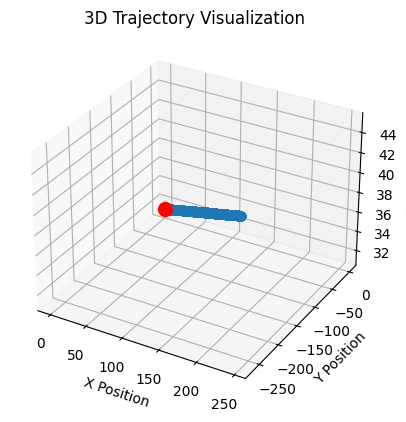

In [13]:



import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_trajectory(trajectory):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x, y, z, _ = zip(*trajectory) 

    ax.scatter(x[0], y[0], z[0], color='red', s=100)  

    ax.plot(x, y, z, marker='o', linestyle='-')
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_zlabel('Z Position')
    plt.title('3D Trajectory Visualization')
    plt.show()

plot_trajectory(trajectory)

In [14]:
import os
file_location = os.path.expanduser('~/inspel/inspel/data/staov_cable_trajectory_0_4.txt')

def save_trajectory(trajectory, filename):
    with open(filename, 'w') as file:
        for point in trajectory:
            line = ','.join(map(str, point)) + '\n'
            file.write(line)

save_trajectory(trajectory, file_location)

print(f"Trajectory saved to {file_location}.")

Trajectory saved to /home/rivermar/inspel/inspel/data/staov_cable_trajectory_0_4.txt.
